In [1]:
from sklearn.cluster import KMeans

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('acquisitions.csv')

In [3]:
df.head()

,id,acquisition_id,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at,source_url,source_description,created_at,updated_at
0,1,1,c:11,c:10,NaN,20000000.0,USD,2007-05-30,http://venturebeat.com/2007/05/30/fox-interact...,Fox Interactive confirms purchase of Photobuck...,2007-05-31 22:19:54,2008-05-21 19:23:44
1,2,7,c:59,c:72,cash,60000000.0,USD,2007-07-01,http://www.techcrunch.com/2007/07/02/deal-is-c...,Deal is Confirmed: Google Acquired GrandCentral,2007-07-03 08:14:50,2011-05-06 21:51:05
2,3,8,c:24,c:132,cash,280000000.0,USD,2007-05-01,http://www.techcrunch.com/2007/05/30/cbs-acqui...,CBS Acquires Europeâs Last.fm for $280 million,2007-07-12 04:19:24,2008-05-19 04:48:50
3,4,9,c:59,c:155,cash,100000000.0,USD,2007-06-01,http://techcrunch.com/2007/05/23/100-million-p...,$100 Million Payday For Feedburner  This Deal...,2007-07-13 09:52:59,2012-06-05 03:22:17
4,5,10,c:212,c:215,cash,25000000.0,USD,2007-07-01,http://blog.seattlepi.nwsource.com/venture/arc...,seatlepi.com,2007-07-20 05:29:07,2008-02-25 00:23:47


In [4]:
df.describe()

,id,acquisition_id,price_amount
count,9562.000000,9562.000000,9.562000e+03
mean,4781.500000,5266.795859,3.886191e+08
std,2760.455971,3009.738380,2.660374e+10
min,1.000000,1.000000,0.000000e+00
25%,2391.250000,2692.250000,0.000000e+00
50%,4781.500000,5197.500000,0.000000e+00
75%,7171.750000,7858.750000,5.000000e+05
max,9562.000000,10529.000000,2.600000e+12


## Iniciamos Limpieza.

In [5]:
df=df.drop(['id', 'acquisition_id','acquiring_object_id', 'acquired_object_id', 'acquired_at', 'source_url', 'source_description', 'created_at', 'updated_at'],axis=1)


In [6]:
df['term_code'].unique()

array([nan, 'cash', 'stock', 'cash_and_stock'], dtype=object)

In [7]:
df = df.dropna(subset=['term_code'])
df = df.dropna(subset=['price_currency_code'])

In [8]:

df.term_code= df.term_code.map({'cash': 0, 'stock': 1, 'cash_and_stock':2})

In [9]:
df['price_currency_code'].unique()

array(['USD', 'EUR', 'CAD', 'SEK', 'GBP', 'JPY'], dtype=object)

In [10]:
df.price_currency_code= df.price_currency_code.map({'USD': 0, 'EUR': 1, 'CAD':2, 'SEK': 3, 'GBP': 4, 'JPY': 5})

In [11]:
df.dtypes

term_code                int64
price_amount           float64
price_currency_code      int64
dtype: object

In [12]:
df['price_amount'] = df['price_amount'].astype(int)

In [13]:
df.describe()

,term_code,price_amount,price_currency_code
count,1906.000000,1.906000e+03,1906.000000
mean,0.584470,4.311641e+07,0.102308
std,0.844591,4.605581e+08,0.588182
min,0.000000,-2.147484e+09,0.000000
25%,0.000000,0.000000e+00,0.000000
50%,0.000000,2.795000e+06,0.000000
75%,1.000000,7.100000e+07,0.000000
max,2.000000,2.100000e+09,5.000000


In [14]:
df = df.reindex(columns=['price_amount','term_code','price_currency_code'])
df.head()

,price_amount,term_code,price_currency_code
1,60000000,0,0
2,280000000,0,0
3,100000000,0,0
4,25000000,0,0
6,0,0,0


## Iniciamos K-Means

In [15]:
cluster_numbers = range(1, 9)
models = [KMeans(n_clusters = cluster) for cluster in cluster_numbers]
score = [model.fit(df).score(df) for model in models]

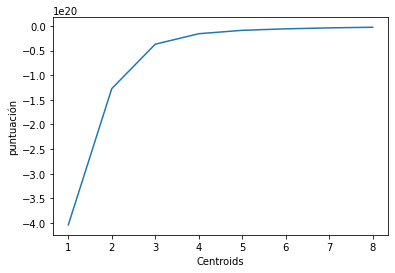

In [16]:
plt.plot(cluster_numbers, score)
plt.xlabel('Centroids')
plt.ylabel('puntuación')
plt.show()

In [17]:
k_means = KMeans(n_clusters=6)
k_means.fit(df)

KMeans(n_clusters=6)

In [18]:
k_means.labels_

array([0, 3, 0, ..., 1, 3, 0])

In [19]:
k_means.cluster_centers_

array([[ 1.78589189e+07,  5.77969476e-01,  1.15461181e-01],
       [-2.14748365e+09,  6.07142857e-01,  1.42857143e-01],
       [ 1.13152622e+09,  5.67567568e-01,  1.38777878e-17],
       [ 2.70860930e+08,  6.13953488e-01,  4.18604651e-02],
       [ 1.77500000e+09,  8.12500000e-01,  0.00000000e+00],
       [ 6.26986667e+08,  5.73333333e-01,  5.33333333e-02]])

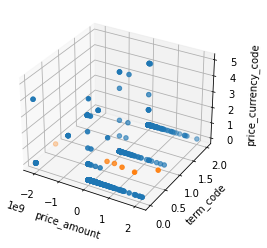

In [20]:
df_numpify = df.to_numpy()
figure = plt.figure()
axis = figure.add_subplot(111, projection='3d')
chart = axis.scatter(df_numpify[:, 0], df_numpify[:, 1], df_numpify[:, 2])
centers = axis.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[
                       :, 1], k_means.cluster_centers_[:, 2])
axis.set_xlabel('price_amount')
axis.set_ylabel('term_code')
axis.set_zlabel('price_currency_code')
plt.show()

In [21]:
acqusitions_classification = [
    'venta malo',
    'venta promedio',
    'venta estandar',
    'venta bueno',
    'venta perfecto',
    'venta estrella'
]

In [22]:
df2 = pd.read_csv('acquisitions.csv')

In [23]:
df2 = df2.dropna(subset=['term_code'])
df2 = df2.dropna(subset=['price_currency_code'])

In [24]:
df2['venta Classification'] = k_means.labels_

In [25]:
df2.head()

,id,acquisition_id,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at,source_url,source_description,created_at,updated_at,venta Classification
1,2,7,c:59,c:72,cash,60000000.0,USD,2007-07-01,http://www.techcrunch.com/2007/07/02/deal-is-c...,Deal is Confirmed: Google Acquired GrandCentral,2007-07-03 08:14:50,2011-05-06 21:51:05,0
2,3,8,c:24,c:132,cash,280000000.0,USD,2007-05-01,http://www.techcrunch.com/2007/05/30/cbs-acqui...,CBS Acquires Europeâs Last.fm for $280 million,2007-07-12 04:19:24,2008-05-19 04:48:50,3
3,4,9,c:59,c:155,cash,100000000.0,USD,2007-06-01,http://techcrunch.com/2007/05/23/100-million-p...,$100 Million Payday For Feedburner  This Deal...,2007-07-13 09:52:59,2012-06-05 03:22:17,0
4,5,10,c:212,c:215,cash,25000000.0,USD,2007-07-01,http://blog.seattlepi.nwsource.com/venture/arc...,seatlepi.com,2007-07-20 05:29:07,2008-02-25 00:23:47,0
6,7,12,c:5,c:230,cash,0.0,USD,2007-07-01,http://www.techcrunch.com/2007/07/19/breaking-...,NaN,2007-07-26 07:36:07,2009-08-10 19:37:37,0
